Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



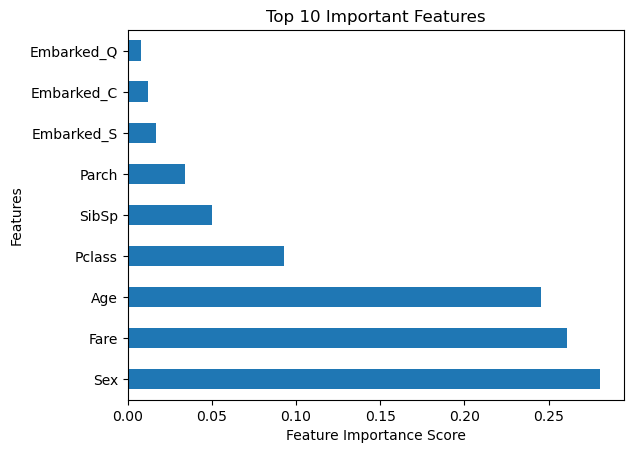

   Death_Prob  Survival_Prob  Predicted  Actual
0      0.6900         0.3100          0       1
1      0.9400         0.0600          0       0
2      0.8825         0.1175          0       0
3      0.0300         0.9700          1       1
4      0.6400         0.3600          0       1
Accuracy: 80.45%
Precision (Not Survived): 83.02%
Recall (Not Survived): 83.81%
F1-Score (Not Survived): 83.41%
Precision (Survived): 76.71%
Recall (Survived): 75.68%
F1-Score (Survived): 76.19%


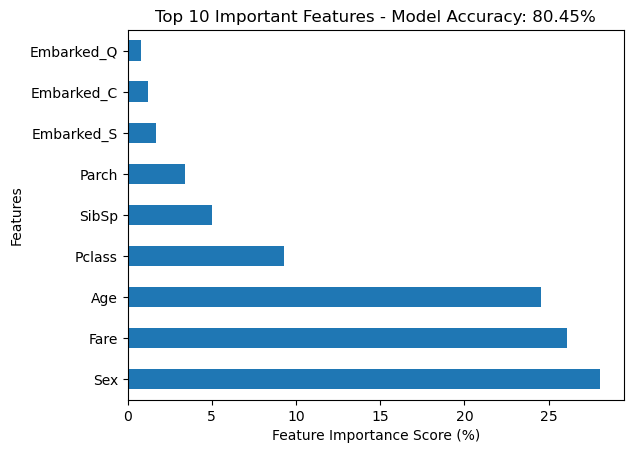

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\nsukh\Downloads\archive (1)\Titanic-Dataset.csv')

# Preprocess the data
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop columns
data = data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

# Convert categorical variables
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, embarked_dummies], axis=1).drop(['Embarked'], axis=1)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.show()

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)

# Create a DataFrame with the probabilities of survival
probabilities_df = pd.DataFrame(probabilities, columns=['Death_Prob', 'Survival_Prob'])
probabilities_df['Predicted'] = y_pred
probabilities_df['Actual'] = y_test.values

# Display the DataFrame
print(probabilities_df.head())

# Calculate metrics and display them as percentages
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Detailed classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision (Not Survived): {report['0']['precision'] * 100:.2f}%")
print(f"Recall (Not Survived): {report['0']['recall'] * 100:.2f}%")
print(f"F1-Score (Not Survived): {report['0']['f1-score'] * 100:.2f}%")
print(f"Precision (Survived): {report['1']['precision'] * 100:.2f}%")
print(f"Recall (Survived): {report['1']['recall'] * 100:.2f}%")
print(f"F1-Score (Survived): {report['1']['f1-score'] * 100:.2f}%")

# Feature importance visualization with percentages
(feature_importances * 100).nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score (%)')
plt.ylabel('Features')
plt.title(f'Top 10 Important Features - Model Accuracy: {accuracy_percentage:.2f}%')
plt.show()
